# Analogue Phase Locked Loop Model

74HCT4046/7046 based analogue phase locked loop frequency response and stability model.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Set supply voltage $V_{CC}$, input frequency $f_{in}$, and output frequency $f_0$

In [ ]:
V_CC = 5
f_in = 1024
f_0 = 384e3

PC2 phase detector gain $K_d=\frac{V_{CC}}{4π}\mathrm{V/rad}$

In [ ]:
K_d = V_CC / (4 * np.pi)

Backlash elimination resistor value $R_P\le\frac{1}{30×10^{-12}f_{in}}$

In [ ]:
R_P = 1 / (30e-12 * f_in)

Frequency ratio $N=\frac{f_o}{f_{in}}$

In [ ]:
N = f_0 / f_in

Select VCO component values  
$C_1=1×10^{-9}\mathrm{F}, R_1=33×10^3Ω, R_2=33×10^3$Ω  

Read typical frequency range from Figure 4  
$R_1C_1=3.3×10^{-5}→2f_R≈200×10^3\mathrm{Hz}$  

Read typical frequency offset from Figure 6  
$R_2C_1=3.3×10^{-5}→f_{off}≈300×10^3\mathrm{Hz}$  

VCO gain $K_o=\frac{4\pi f_R}{V_{CC}-2.2}\mathrm{rad/sV}$  

In [ ]:
f_R = 200e3 / 2
K_o = 4 * np.pi * f_R / (V_CC - 2.2)

Select lag-lead filter component values $C_2$, $R_3$, $R_4$  

$τ_1=R_3C_2$  
$τ_2=R_4C_2$  

In [ ]:
C_2 = 470e-9
R_3 = 2.7e3
R_4 = 0
tau_1 = R_3 * C_2
tau_2 = R_4 * C_2

Define open and closed loop transfer functions  

$G(s)=\frac{K}{s}\frac{sτ_2+1}{s(τ_1+τ_2)+1}$ where $K=K_dK_o/N$  
$H(s)=\frac{G(s)}{1+G(s)}$

In [ ]:
K = K_d * K_o / N
G = lambda s : (K / s) * (s * tau_2 + 1) / (s * (tau_1 + tau_2) + 1)
H = lambda s : G(s) / (1 + G(s))

Plot frequency and phase response.

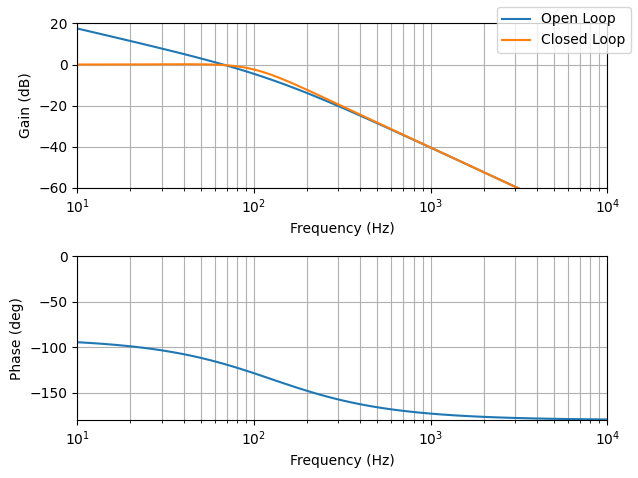

In [111]:
fig, axes = plt.subplots(2, 1)

f_min, f_max = 10, 10e3
f = np.logspace(np.log10(f_min), np.log10(f_max), 100)

axes[0].semilogx(f, 20 * np.log10(np.abs(G(1j * 2 * np.pi * f))))
axes[0].semilogx(f, 20 * np.log10(np.abs(H(1j * 2 * np.pi * f))))
axes[0].set_xlim((f_min, f_max))
axes[0].set_ylim((-60, 20))
axes[0].xaxis.grid(True, 'both')
axes[0].yaxis.grid(True)
axes[0].set_xlabel('Frequency (Hz)')
axes[0].set_ylabel('Gain (dB)')

axes[1].semilogx(f, 180 * np.angle(G(1j * 2 * np.pi * f)) / np.pi)
axes[1].set_xlim((f_min, f_max))
axes[1].set_ylim((-180, 0))
axes[1].xaxis.grid(True, 'both')
axes[1].yaxis.grid(True)
axes[1].set_xlabel('Frequency (Hz)')
axes[1].set_ylabel('Phase (deg)')

fig.legend(('Open Loop', 'Closed Loop'))
fig.tight_layout()